In [1]:
%load_ext autoreload
%autoreload 2 

In [2]:
import torch 
import numpy as np
from data import Datagen
from neuralNets import FeedForwardNet, SquaredNet
import crocoddyl
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
ffnet = torch.load("fnet.pth")
sqnet = torch.load("sqnet.pth")

In [4]:
data = Datagen()

In [24]:
positions = data.constant_data(0.5)

x = 0.5, theta = 0.


In [25]:
ffnet_jacobians = ffnet.batch_jacobian(torch.tensor(positions, dtype = torch.float32)).detach().numpy()
ffnet_hessians = ffnet.batch_hessian(torch.tensor(positions, dtype = torch.float32)).detach().numpy()

In [26]:
sqnet_jacobians = sqnet.batch_jacobian(torch.tensor(positions, dtype = torch.float32)).detach().numpy()
sqnet_hessians = sqnet.batch_hessian(torch.tensor(positions, dtype = torch.float32)).detach().numpy()

In [27]:
vx  = []
vxx = []
for xyz in positions:
    ddp = data.solver_ddp(xyz)
    vx.append(ddp.Vx[0][1])
    vxx.append(ddp.Vxx[0][1][1])


In [28]:
vxf = []
vxxf = []
for j, h in zip(ffnet_jacobians, ffnet_hessians):
    vxf.append(j[1])
    vxxf.append(h[1][1])

In [29]:
vxs = []
vxxs= []
for j, h in zip(sqnet_jacobians, sqnet_hessians):
    vxs.append(j[1])
    vxxs.append(h[1][1])

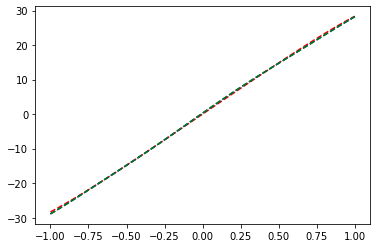

In [30]:

plt.clf()
plt.plot(positions[:,1], vx, '--r')
plt.plot(positions[:,1], vxf, '--b')
plt.plot(positions[:,1], vxs, '--g')

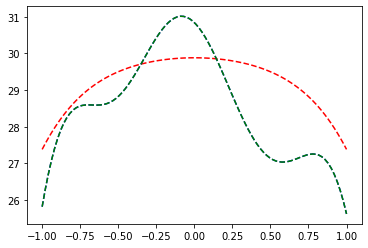

In [31]:
plt.clf()
plt.plot(positions[:,1], vxx, '--r')
plt.plot(positions[:,1], vxxf, '--b')
plt.plot(positions[:,1], vxxs, '--g')